In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../Data/Speed Dating Data.csv', encoding = "ISO-8859-1", engine='python')
pd.set_option("display.max_columns", None)
data

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

# Checking the number of participants by gender in each speed dating wave:

In [2]:
#counting how many people participated per wave
participants_wave = data.groupby(['gender','wave']).agg({'iid':pd.Series.nunique})

participants_wave

iid
gender wave     
0      1      10
       2      19
       3      10
       4      18
       5       9
       6       5
       7      16
       8      10
       9      20
       10      9
       11     21
       12     14
       13     10
       14     20
       15     18
       16      6
       17     10
       18      6
       19     15
       20      6
       21     22
1      1      10
       2      16
       3      10
       4      18
       5      10
       6       5
       7      16
       8      10
       9      20
       10      9
       11     21
       12     14
       13      9
       14     18
       15     19
       16      8
       17     14
       18      6
       19     15
       20      7
       21     22

# Creating new table with select focus columns:
Adding in the total of each persons self rating and self market rating.

In [104]:
market = ['attr5_1','intel5_1','sinc5_1','fun5_1','amb5_1']
self = ['attr3_1','intel3_1','sinc3_1','fun3_1','amb3_1']
scores = data[['iid','gender','race','age','income','attr3_1','intel3_1','sinc3_1','fun3_1','amb3_1','attr5_1','intel5_1','sinc5_1','fun5_1','amb5_1']].copy().fillna(0)
scores['Total Market Rating'] = scores[market].sum(axis=1)
scores['Total Self Rating'] = scores[self].sum(axis=1)
grouped = scores.groupby('iid').agg('max')
grouped

,gender,race,age,income,attr3_1,intel3_1,sinc3_1,fun3_1,amb3_1,attr5_1,intel5_1,sinc5_1,fun5_1,amb5_1,Total Market Rating,Total Self Rating
iid,,,,,,,,,,,,,,,,
1,0,4.0,21.0,69487.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2,0,2.0,24.0,65929.0,7.0,8.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
3,0,2.0,25.0,0.0,8.0,9.0,9.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
4,0,2.0,23.0,37754.0,7.0,7.0,8.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
5,0,2.0,21.0,86340.0,6.0,10.0,3.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,1,2.0,30.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0,50.0
549,1,2.0,28.0,0.0,7.0,9.0,10.0,8.0,9.0,7.0,10.0,10.0,7.0,7.0,41.0,43.0
550,1,2.0,30.0,0.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,35.0,35.0


# How do people think they measure up in the market?
### The following question was asked:
"How do you think you measure up?
Please rate your opinion of your own attributes, on a scale of 1-10 (be honest!):"
- attr3_1 
  *Attractive
- sinc3_1
  *Sincere
- int3_1
  *Intelligent
- fun3_1
  *Fun
- amb3_1
  *Ambitious
  
Seeing if there is some correlation between people's attributes to their overal market and self rating.

In [115]:
corr_market = grouped.corr().filter(market).drop(market)
corr_self = grouped.corr().filter(self).drop(self)

corr_market

,attr5_1,intel5_1,sinc5_1,fun5_1,amb5_1
gender,-0.011471,0.014175,-0.021428,-0.005876,-0.014494
race,0.061513,0.070987,0.100838,0.066190,0.077967
age,0.187413,0.196389,0.200518,0.165107,0.178681
income,-0.080145,-0.084994,-0.070070,-0.075293,-0.088776
attr3_1,0.230028,0.107529,0.092400,0.144217,0.116998
intel3_1,0.122091,0.164293,0.118388,0.103856,0.130390
sinc3_1,0.155339,0.161958,0.233060,0.150153,0.172884
fun3_1,0.142945,0.093158,0.087227,0.230297,0.133849
amb3_1,0.126190,0.134384,0.108740,0.130905,0.220583
Total Market Rating,0.971625,0.984579,0.970536,0.966911,0.970975


Text(0.5, 0, 'Attributes')

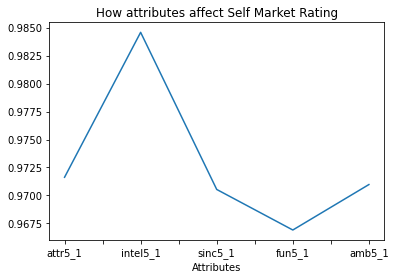

In [122]:
corr_market.loc['Total Market Rating'].plot(title = 'How attributes affect Self Market Rating').set_xlabel('Attributes')


In [123]:
corr_self

,attr3_1,intel3_1,sinc3_1,fun3_1,amb3_1
gender,-0.057095,0.093440,-0.069125,-0.086609,-0.003935
race,0.015422,0.089210,0.168213,0.076903,0.070342
age,0.271763,0.335405,0.269499,0.188015,0.143772
income,0.052781,0.060771,0.025565,0.060644,0.045218
attr5_1,0.230028,0.122091,0.155339,0.142945,0.126190
intel5_1,0.107529,0.164293,0.161958,0.093158,0.134384
sinc5_1,0.092400,0.118388,0.233060,0.087227,0.108740
fun5_1,0.144217,0.103856,0.150153,0.230297,0.130905
amb5_1,0.116998,0.130390,0.172884,0.133849,0.220583
Total Market Rating,0.139597,0.131913,0.180213,0.139960,0.148285


Text(0.5, 0, 'Attributes')

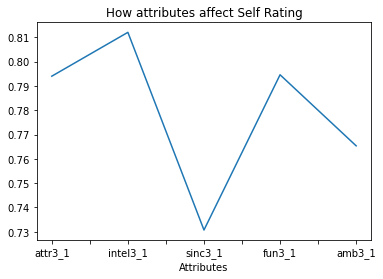

In [120]:
corr_self.loc['Total Self Rating'].plot(title = 'How attributes affect Self Rating').set_xlabel('Attributes')

# How many people gave themselves ratings?

Organizing by gender, only 6 women and 3 men did not give themselves a self rating.

In [108]:
#filtering for people who did not give themselves an attractiveness rating
empty_text = pd.isnull(data['attr3_1'])

no_rating = data[empty_text].groupby(['gender'])['iid'].nunique()
no_rating

gender
0    6
1    3
Name: iid, dtype: int64

In [109]:
#filtering for people who gave themselves an attractiveness rating.
s_rating = pd.notnull(data['attr3_1'])

#count of people who gave themselves ratings by gender
self_rating = data[s_rating].groupby('gender')['iid'].nunique()

self_rating

gender
0    268
1    274
Name: iid, dtype: int64

## How did participant's self ratings scores average out on a scale of 1-10, 10 being the most attractive?

In [21]:
#averages of self rating
s_a_rating = data[s_rating].groupby('gender')['attr3_1','intel3_1','sinc3_1','fun3_1','amb3_1'].agg('mean').rename(index={0:'female', 1:'male'})

s_a_rating

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,attr3_1,intel3_1,sinc3_1,fun3_1,amb3_1
gender,,,,,
female,7.226378,8.313335,8.454700,7.904542,7.632499
male,6.978585,8.493263,8.149904,7.513715,7.528152


## Utilizing a sample of 100 people our population to see how particpant's self rating averaged out since there is an uneven amount of men and women who gave themselves scores.

In [110]:
def sample_dist_avg(population,column, attribute_list):  
    newdf = population.loc[(population.loc[:,column] != "")] 
    sample = newdf.sample(n = 100, replace = False)
    grouped = sample.groupby('gender')[attribute_list].agg('mean').rename(index={0:'female', 1:'male'})
    return grouped


#mean of self rated attributes from a sample of 100 people who gave themselves ratings
sample_dist_avg(data,'attr3_1',['attr3_1','intel3_1','sinc3_1','fun3_1','amb3_1'])

/home/olivia/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,attr3_1,intel3_1,sinc3_1,fun3_1,amb3_1
gender,,,,,
female,7.265306,8.306122,8.408163,7.755102,7.77551
male,7.060000,8.720000,8.460000,7.500000,7.56000


#### Using the same sample distribution function to look at average scores for people who gave themselves a market rating.

In [111]:
#average of sample data of people who took a guess of how they are percieved in the market
sample_dist_avg(data,'attr5_1',['attr5_1','intel5_1','sinc5_1','fun5_1','amb5_1'])

/home/olivia/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,attr5_1,intel5_1,sinc5_1,fun5_1,amb5_1
gender,,,,,
female,6.896552,8.172414,7.793103,7.551724,7.758621
male,7.333333,8.600000,7.933333,7.533333,7.366667


## Focus on people who have a self market rating:

In [112]:
#filtering for people who did not give themselves a a perceived attractiveness rating
text_empty = pd.isnull(data['attr5_1'])

null_rating = data[text_empty].groupby(['gender'])['iid'].nunique()
null_rating



gender
0    119
1    118
Name: iid, dtype: int64

In [113]:
#filtering for people who gave themselves an attractiveness rating.
g_rating = pd.notnull(data['attr5_1'])


In [114]:
#count of people who rated themselves by gender
#female = 0
#male = 1
gender_rating = data[g_rating].groupby('gender')['iid'].nunique()

gender_rating

gender
0    155
1    159
Name: iid, dtype: int64

In [9]:
#average rating of people who gave themselves a guess of their market value
average_rating = data[g_rating].groupby('gender')['attr5_1','intel5_1','sinc5_1','fun5_1','amb5_1'].agg('mean').rename(index={0:'female', 1:'male'})

average_rating

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,attr5_1,intel5_1,sinc5_1,fun5_1,amb5_1
gender,,,,,
female,7.017893,8.232208,8.110207,7.507523,7.739325
male,6.871271,8.337148,7.720065,7.362076,7.494892


In [11]:
#picking out a specific contestant who has a rating of their attractiveness level
c_234 = data.loc[data['iid'] == 234]

c_234

,iid,id,gender,idg,condtn,wave,Number of people met,station met,start station,order,partner,pid,match,interest level,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
3408,234,1.0,0,1,1,10,9,8,8.0,7,1,243.0,0,0.43,0,27.0,2.0,20.0,20.0,20.0,25.0,5.0,10.0,1,6.0,9.0,7.0,7.0,8.0,NaN,7.0,7.0,2.0,22.0,Sociology and Education,3.0,George Mason University,1070.0,12696.0,6.0,1.0,5.0,Virginia,23060.0,44346.0,3.0,7.0,3.0,Educational Policy,2,5,3.0,10.0,10.0,9.0,5.0,2.0,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0,5.0,NaN,20.0,20.0,20.0,10.0,10.0,20.0,10.0,20.0,20.0,20.0,15.0,15.0,75.0,1.0,1.0,3.0,10.0,10.0,7.0,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,0,4.0,8.0,9.0,7.0,8.0,2.0,5.0,2.0,0.0,1.0,30.0,20.0,20.0,10.0,10.0,5.0,8.0,10.0,9.0,10.0,10.0,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,15.0,20.0,20.0,15.0,10.0,25.0,20.0,15.0,20.0,10.0,10.0,50.0,5.0,5.0,20.0,10.0,10.0,8.0,9.0,9.0,9.0,10.0,9.0,6.0,9.0,7.0,10.0,0.0,0.0,0.0,NaN,NaN,15.0,10.0,20.0,20.0,15.0,20.0,25.0,15.0,15.0,20.0,15.0,10.0,15.0,15.0,20.0,10.0,20.0,20.0,50.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,9.0,8.0,10.0,9.0,10.0,10.0,7.0,10.0,NaN
3409,234,1.0,0,1,1,10,9,8,8.0,4,2,244.0,0,0.46,0,28.0,2.0,20.0,20.0,20.0,10.0,10.0,20.0,0,6.0,8.0,9.0,8.0,9.0,3.0,3.0,2.0,2.0,22.0,Sociology and Education,3.0,George Mason University,1070.0,12696.0,6.0,1.0,5.0,Virginia,23060.0,44346.0,3.0,7.0,3.0,Educational Policy,2,5,3.0,10.0,10.0,9.0,5.0,2.0,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0,5.0,NaN,20.0,20.0,20.0,10.0,10.0,20.0,10.0,20.0,20.0,20.0,15.0,15.0,75.0,1.0,1.0,3.0,10.0,10.0,7.0,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,1,7.0,8.0,8.0,7.0,9.0,5.0,7.0,4.0,0.0,1.0,30.0,20.0,20.0,10.0,10.0,5.0,8.0,10.0,9.0,10.0,10.0,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,15.0,20.0,20.0,15.0,10.0,25.0,20.0,15.0,20.0,10.0,10.0,50.0,5.0,5.0,20.0,10.0,10.0,8.0,9.0,9.0,9.0,10.0,9.0,6.0,9.0,7.0,10.0,0.0,0.0,0.0,NaN,NaN,15.0,10.0,20.0,20.0,15.0,20.0,25.0,15.0,15.0,20.0,15.0,10.0,15.0,15.0,20.0,10.0,20.0,20.0,50.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,9.0,8.0,10.0,9.0,10.0,10.0,7.0,10.0,NaN
3410,234,1.0,0,1,1,10,9,8,8.0,6,3,245.0,0,0.05,0,32.0,2.0,18.0,10.0,30.0,10.0,10.0,22.0,1,8.0,7.0,6.0,6.0,NaN,5.0,7.0,3.0,2.0,22.0,Sociology and Education,3.0,George Mason University,1070.0,12696.0,6.0,1.0,5.0,Virginia,23060.0,44346.0,3.0,7.0,3.0,Educational Policy,2,5,3.0,10.0,10.0,9.0,5.0,2.0,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0,5.0,NaN,20.0,20.0,20.0,10.0,10.0,20.0,10.0,20.0,20.0,20.0,15.0,15.0,75.0,1.0,1.0,3.0,10.0,10.0,7.0,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,0,4.0,6.0,10.0,6.0,6.0,7.0,6.0,2.0,0.0,1.0,30.0,20.0,20.0,10.0,10.0,5.0,8.0,10.0,9.0,10.0,10.0,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,15.0,20.0,20.0,15.0,10.0,25.0,20.0,15.0,20.0,10.0,10.0,50.0

## Exploring different points of our data:

In [12]:
intentions = data.copy(deep=True)

intentions.drop(intentions.iloc[:,7:45],axis = 1, inplace = True)

intentions_df = intentions.groupby('iid').min()

intentions_df

,id,gender,idg,condtn,wave,Number of people met,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
iid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,0,1,1,1,10,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0,4.0,6.0,6.0,4.0,5.0,4.0,6.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0,3,1,1,10,1.0,5.0,1.0,law,NaN,3,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,5.0,6.0,3.0,3.0,2.0,5.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,0,5,1,1,10,6.0,3.0,1.0,Economist,NaN,3,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0,7.0,7.0,9.0,7.0,7.0,7.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0,7,1,1,10,1.0,5.0,1.0,lawyer/policy work,1,1,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0,4.0,7.0,7.0,4.0,6.0,2.0,4.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,24.14,13.79,20.69,27.59,10.34,3.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,20.0,20.0,20.0,20.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,0,9,1,1,10,2.0,4.0,1.0,lawyer,1,7,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8

In [13]:
'''
What is your primary goal in participating in this event? 
    Seemed like a fun night out=1
	To meet new people=2
	To get a date=3
	Looking for a serious relationship=4
	To say I did it=5
	Other=6
    
    In general, how frequently do you go on dates? 
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7
    
    How often do you go out (not necessarily on dates)?
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7
    '''
gender_intentions = intentions_df.groupby('gender')['goal','date','go_out'].agg('mean')

gender_intentions

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,goal,date,go_out
gender,,,
0,2.096654,5.133829,2.130112
1,2.200000,4.835766,2.156364


## What are attributes participants rank the highest based off of ethnicity?

In [14]:
'''Black/African American=1
	European/Caucasian-American=2
	Latino/Hispanic American=3
	Asian/Pacific Islander/Asian-American=4
	Native American=5
	Other=6'''


females_ = data[data['gender'] == 0]

wfm = females_.drop_duplicates('iid').groupby('race')['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg(['mean','min','max'])

wfm1 = wfm.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
wfm1

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


attr1_1                sinc1_1        \
                                            mean   min   max       mean   min   
race                                                                            
Black/African American                 19.350625  10.0  50.0  16.060000   5.0   
European/Caucasian-American            17.843262   5.0  50.0  17.608156   0.0   
Latino/Hispanic American               19.278400   0.0  50.0  18.715600  10.0   
Asian/Pacific Islander/Asian-American  17.531972   2.0  90.0  19.517887   0.0   
Other                                  18.682667   5.0  50.0  18.650625   3.0   

                                               intel1_1              \
                                         max       mean   min   max   
race                                                                  
Black/African American                 21.74  18.783750  10.0  35.0   
European/Caucasian-American            40.00  21.271560   5.0  50.0   
Latino/Hispanic American               32.00  22.465200  10.0  35.0   
Asian/Pacific Islander/Asian-American  60.00  20.442394   2.0  50.0   
Other                                  35.00  21.145625  10.0  50.0   

                                          fun1_1                 amb1_1       \
                                            mean   min   max       mean  min   
race                                                                           
Black/African American                 17.721250  10.0  30.0  15.580625  5.0   
European/Caucasian-American            17.970780   5.0  40.0  13.134043  0.0   
Latino/Hispanic American               15.863600   5.0  35.0  12.415200  0.0   
Asian/Pacific Islander/Asian-American  16.551549   0.0  30.0  12.059014  0.0   
Other                                  16.518125   5.0  30.0  11.275625  2.0   

                                                shar1_1             
                                         max       mean  min   max  
race                                                                
Black/African American                 30.00  12.504375  0.0  20.0  
European/Caucasian-American            20.00  12.243121  0.0  30.0  
Latino/Hispanic American               25.00  11.107500  0.0  30.0  
Asian/Pacific Islander/Asian-American  20.00  13.898028  0.0  30.0  
Other                                  20.41  13.958125  5.0  20.0

In [15]:
idx = pd.IndexSlice
mean_w = wfm1.loc[:,idx[:,'mean']] 
mean_w.stack()

,,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
race,,,,,,,
Black/African American,mean,19.350625,16.060000,18.783750,17.721250,15.580625,12.504375
European/Caucasian-American,mean,17.843262,17.608156,21.271560,17.970780,13.134043,12.243121
Latino/Hispanic American,mean,19.278400,18.715600,22.465200,15.863600,12.415200,11.107500
Asian/Pacific Islander/Asian-American,mean,17.531972,19.517887,20.442394,16.551549,12.059014,13.898028
Other,mean,18.682667,18.650625,21.145625,16.518125,11.275625,13.958125


## Seeing the most attractive attributes by ethnicity and gender:

In [16]:
#Women by ethnicity and age
wa = females_.drop_duplicates('iid').groupby(['race'])['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg(['mean','min','max'])
wea = wa.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
wea


/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


attr1_1                sinc1_1        \
                                            mean   min   max       mean   min   
race                                                                            
Black/African American                 19.350625  10.0  50.0  16.060000   5.0   
European/Caucasian-American            17.843262   5.0  50.0  17.608156   0.0   
Latino/Hispanic American               19.278400   0.0  50.0  18.715600  10.0   
Asian/Pacific Islander/Asian-American  17.531972   2.0  90.0  19.517887   0.0   
Other                                  18.682667   5.0  50.0  18.650625   3.0   

                                               intel1_1              \
                                         max       mean   min   max   
race                                                                  
Black/African American                 21.74  18.783750  10.0  35.0   
European/Caucasian-American            40.00  21.271560   5.0  50.0   
Latino/Hispanic American               32.00  22.465200  10.0  35.0   
Asian/Pacific Islander/Asian-American  60.00  20.442394   2.0  50.0   
Other                                  35.00  21.145625  10.0  50.0   

                                          fun1_1                 amb1_1       \
                                            mean   min   max       mean  min   
race                                                                           
Black/African American                 17.721250  10.0  30.0  15.580625  5.0   
European/Caucasian-American            17.970780   5.0  40.0  13.134043  0.0   
Latino/Hispanic American               15.863600   5.0  35.0  12.415200  0.0   
Asian/Pacific Islander/Asian-American  16.551549   0.0  30.0  12.059014  0.0   
Other                                  16.518125   5.0  30.0  11.275625  2.0   

                                                shar1_1             
                                         max       mean  min   max  
race                                                                
Black/African American                 30.00  12.504375  0.0  20.0  
European/Caucasian-American            20.00  12.243121  0.0  30.0  
Latino/Hispanic American               25.00  11.107500  0.0  30.0  
Asian/Pacific Islander/Asian-American  20.00  13.898028  0.0  30.0  
Other                                  20.41  13.958125  5.0  20.0

## Organizing the most attractive attributes by gender, ethnicity, and age groups:

In [17]:
def age_ethnicity(data):
    copy_data = data.copy()
    bins = [18,30,40,50,60,70,100]
    labels = ['18-29','30-39', '40-49', '50-59', '60-69', '70+']
    copy_data['agerange'] = pd.cut(copy_data.age, bins, labels = labels,include_lowest = True)
    rm_dupes = copy_data.drop_duplicates('iid').groupby(['race','agerange'])['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg(['mean','min','max']).dropna()
    ethnicity = rm_dupes.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
    return ethnicity

a_e_f = age_ethnicity(females_)
a_e_f

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


attr1_1               \
                                                     mean    min   max   
race                                  agerange                           
Black/African American                18-29     20.002308  10.00  50.0   
                                      30-39     16.526667  14.58  20.0   
European/Caucasian-American           18-29     18.269274   5.00  50.0   
                                      30-39     14.406875   5.00  25.0   
Latino/Hispanic American              18-29     18.270909   0.00  50.0   
                                      30-39     26.666667  10.00  40.0   
Asian/Pacific Islander/Asian-American 18-29     17.654615   5.00  90.0   
                                      30-39     14.444000   2.00  25.0   
                                      50-59     25.000000  25.00  25.0   
Other                                 18-29     18.682667   5.00  50.0   

                                                  sinc1_1               \
                                                     mean   min    max   
race                                  agerange                           
Black/African American                18-29     15.791538   5.0  21.74   
                                      30-39     17.223333  15.0  20.00   
European/Caucasian-American           18-29     17.409194   0.0  40.00   
                                      30-39     19.000625   5.0  25.00   
Latino/Hispanic American              18-29     17.767727  10.0  25.00   
                                      30-39     25.666667  15.0  32.00   
Asian/Pacific Islander/Asian-American 18-29     19.128923   0.0  47.00   
                                      30-39     28.478000  15.0  60.00   
                                      50-59      0.000000   0.0   0.00   
Other                                 18-29     18.650625   3.0  35.00   

                                                 intel1_1               \
                                                     mean   min    max   
race                                  agerange                           
Black/African American                18-29     18.823846  10.0  35.00   
                                      30-39     18.610000  15.0  20.83   
European/Caucasian-American           18-29     21.211935   5.0  50.00   
                                      30-39     21.813125  10.0  45.00   
Latino/Hispanic American              18-29     22.119545  10.0  35.00   
                                      30-39     25.000000  20.0  30.00   
Asian/Pacific Islander/Asian-American 18-29     20.523385   2.0  50.00   
                                      30-39     18.478000  10.0  30.00   
                                      50-59     25.000000  25.0  25.00   
Other                                 18-29     21.145625  10.0  50.00   

                                                   fun1_1               \
                                                     mean   min    max   
race                                  agerange                           
Black/African American                18-29     17.676154  10.0  30.00   
                                      30-39     17.916667  15.0  20.00   
European/Caucasian-American           18-29     18.210645   5.0  40.00   
                                      30-39     15.985000   8.0  25.00   
Latino/Hispanic American              18-29     17.026818  10.0  35.00   
                                      30-39      7.333333   5.0  12.00   
Asian/Pacific Islander/Asian-American 18-29     16.688769   0.0  30.00   
                                      30-39     13.078000   8.0  17.39   
                                      50-59     25.000000  25.0  25.00   
Other                                 18-29     16.518125   5.0  30.00   

                                                   amb1_1               \
                                                     mean   min    max   
race                                  agerange    

In [18]:
males_ = data[data['gender'] == 1]
mfm = males_.drop_duplicates('iid').groupby('race')['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg(['mean','min','max'])
mfm1 = mfm.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
mfm

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


attr1_1                  sinc1_1               intel1_1               \
           mean    min    max       mean   min   max       mean   min    max   
race                                                                           
1.0   25.700000  16.00   40.0  17.800000  10.0  25.0  20.500000  18.0  25.00   
2.0   28.369074   6.67  100.0  15.173951   0.0  40.0  20.189815   0.0  42.86   
3.0   25.125882  10.00   75.0  17.027647   5.0  25.0  20.331765   5.0  35.00   
4.0   25.708615   7.00   80.0  18.650781   5.0  40.0  16.785538   0.0  30.00   
6.0   25.353810  10.00   55.0  17.432857   0.0  30.0  19.909048   1.0  30.00   

         fun1_1                  amb1_1               shar1_1             
           mean   min    max       mean  min   max       mean  min   max  
race                                                                      
1.0   17.000000  10.0  20.00   8.200000  0.0  15.0   9.900000  0.0  16.0  
2.0   18.087654   0.0  50.00   8.193168  0.0  20.0  10.285901  0.0  30.0  
3.0   16.155294  10.0  23.26  10.951176  0.0  53.0  13.233529  0.0  22.0  
4.0   16.349375   5.0  30.00   9.923437  0.0  20.0  13.137031  0.0  30.0  
6.0   19.210952   5.0  40.00   9.217619  1.0  20.0   8.399524  0.0  21.0

In [33]:
a_e_m = age_ethnicity(males_)
a_e_m

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


attr1_1                 \
                                                     mean    min     max   
race                                  agerange                             
Black/African American                18-29     25.700000  16.00   40.00   
European/Caucasian-American           18-29     28.652378   6.67  100.00   
                                      30-39     25.570000  10.00   50.00   
                                      40-49     23.810000  23.81   23.81   
Latino/Hispanic American              18-29     25.446250  10.00   75.00   
                                      30-39     20.000000  20.00   20.00   
Asian/Pacific Islander/Asian-American 18-29     26.221833   7.00   80.00   
                                      30-39     19.550000  15.00   30.00   
Other                                 18-29     26.554706  10.00   55.00   
                                      30-39     20.250000  19.00   22.00   

                                                  sinc1_1                \
                                                     mean    min    max   
race                                  agerange                            
Black/African American                18-29     17.800000  10.00  25.00   
European/Caucasian-American           18-29     15.221538   0.00  40.00   
                                      30-39     13.981765   0.00  20.00   
                                      40-49     23.810000  23.81  23.81   
Latino/Hispanic American              18-29     16.841875   5.00  25.00   
                                      30-39     20.000000  20.00  20.00   
Asian/Pacific Islander/Asian-American 18-29     18.745424   5.00  40.00   
                                      30-39     17.534000  10.00  30.00   
Other                                 18-29     17.358235   0.00  30.00   
                                      30-39     17.750000  10.00  22.00   

                                                 intel1_1                \
                                                     mean    min    max   
race                                  agerange                            
Black/African American                18-29     20.500000  18.00  25.00   
European/Caucasian-American           18-29     19.959790   0.00  42.86   
                                      30-39     21.922941  10.00  40.00   
                                      40-49     23.810000  23.81  23.81   
Latino/Hispanic American              18-29     20.352500   5.00  35.00   
                                      30-39     20.000000  20.00  20.00   
Asian/Pacific Islander/Asian-American 18-29     16.821833   0.00  30.00   
                                      30-39     16.350000  10.00  20.00   
Other                                 18-29     19.652353   1.00  30.00   
                                      30-39     21.000000  15.00  30.00   

                                                   fun1_1                \
                                                     mean    min    max   
race                                  agerange                            
Black/African American                18-29     17.000000  10.00  20.00   
European/Caucasian-American           18-29     18.102797   0.00  50.00   
                                      30-39     17.511176   5.00  30.00   
                                      40-49     23.810000  23.81  23.81   
Latino/Hispanic American              18-29     16.227500  10.00  23.26   
                                      30-39     15.000000  15.00  15.00   
Asian/Pacific Islander/Asian-American 18-29     16.297119   5.00  30.00   
                                      30-39     16.966000  10.00  20.83   
Other                                 18-29     19.672353   5.00  40.00   
                                      30-39     17.250000  15.00  20.00   

                                                   amb1_1                \
                                                     mean 